In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('kyphosis.csv')

In [6]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


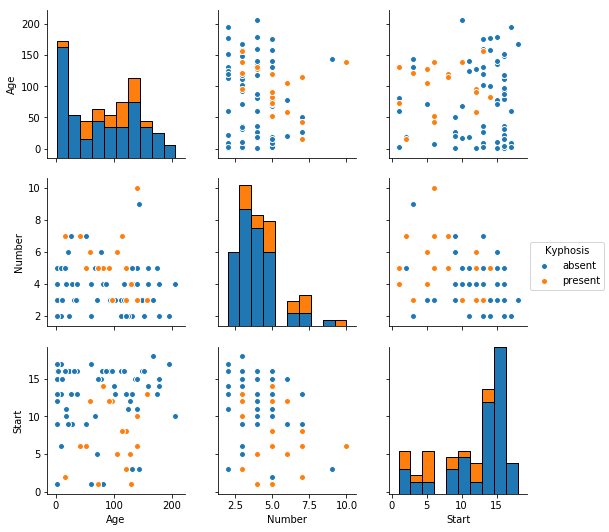

In [8]:
sns.pairplot(data=df, hue='Kyphosis', diag_kws=dict(edgecolor='black'))

In [9]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
X = df.drop('Kyphosis', axis=1)

In [11]:
y = df['Kyphosis']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree = DecisionTreeClassifier()

In [15]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
predictions = dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test, predictions))

[[15  4]
 [ 2  4]]


In [19]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

     absent       0.88      0.79      0.83        19
    present       0.50      0.67      0.57         6

avg / total       0.79      0.76      0.77        25



In [20]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=5000)

In [34]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
rfc_pred = rfc.predict(X_test)

In [42]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[18  1]
 [ 4  2]]


             precision    recall  f1-score   support

     absent       0.82      0.95      0.88        19
    present       0.67      0.33      0.44         6

avg / total       0.78      0.80      0.77        25



In [43]:
df['Kyphosis'].value_counts

<bound method IndexOpsMixin.value_counts of 0      absent
1      absent
2     present
3      absent
4      absent
5      absent
6      absent
7      absent
8      absent
9     present
10    present
11     absent
12     absent
13     absent
14     absent
15     absent
16     absent
17     absent
18     absent
19     absent
20     absent
21    present
22    present
23     absent
24    present
25     absent
26     absent
27     absent
28     absent
29     absent
       ...   
51     absent
52    present
53     absent
54     absent
55     absent
56     absent
57    present
58     absent
59     absent
60    present
61    present
62     absent
63     absent
64     absent
65     absent
66     absent
67     absent
68     absent
69     absent
70     absent
71     absent
72     absent
73     absent
74     absent
75     absent
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object>

In [44]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [46]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [49]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

FileNotFoundError: [Errno 2] "dot" not found in path.

In [51]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, fi)

SyntaxError: positional argument follows keyword argument (<ipython-input-51-bdf62f66e8aa>, line 2)